# Detectable Gamma ray burst (GRB) and Gravitational Wave (GW) event associated with Binary Neutron Star (BNS) mergers.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import json

### Function to retrieve data from json file

In [5]:
def get_param_from_json(json_file):
    """
    Function to get the parameters from json file.

    Parameters
    ----------
    json_file : `str`
        json file name for storing the parameters.

    Returns
    ----------
    param : `dict`
    """
    with open(json_file, "r", encoding="utf-8") as f:
        param = json.load(f)

    for key, value in param.items():
        param[key] = np.array(value)
    return param


## Condition1: GRB with associated GW

In [6]:
# get the parameters for the unlensed GRB
unlensed_param_detectable = get_param_from_json("ler_data/n_unlensed_params_detectable_grb2.json")
zs_grb_unlensed = unlensed_param_detectable['zs']
viewing_angle_grb_unlensed = unlensed_param_detectable['theta_jn']
# radian to degree
viewing_angle_grb_unlensed = np.degrees(viewing_angle_grb_unlensed)
# if angle > 90, then angle = 180 - angle
viewing_angle_grb_unlensed[viewing_angle_grb_unlensed > 90] = viewing_angle_grb_unlensed[viewing_angle_grb_unlensed > 90]-90

In [7]:
# get the parameters for the lensed GRB
lensed_param_detectable = get_param_from_json("ler_data/n_lensed_params_detectable_grb2.json")
zs_grb_lensed = lensed_param_detectable['zs']
viewing_angle_grb_lensed = lensed_param_detectable['theta_jn']
# radian to degree
viewing_angle_grb_lensed = np.degrees(viewing_angle_grb_lensed)
# if angle > 90, then angle = 180 - angle
viewing_angle_grb_lensed[viewing_angle_grb_lensed > 90] = viewing_angle_grb_lensed[viewing_angle_grb_lensed > 90]-90

# SNR for lensed GW
snr_lensed = lensed_param_detectable['optimal_snr_net']

In [10]:
# blue: detection, red: non-detection
num_ = np.round(len(viewing_angle_grb_lensed)/30)
idx_ = np.arange(int(num_)) # reduce the number of points to make the plot clearer

plt.figure(figsize=(6,6))

# unlensed GRB
plt.scatter(viewing_angle_grb_unlensed, zs_grb_unlensed, c='C9', label="Detectable unlensed GRB", alpha=0.4, marker='.', s=20)

# lensed GRB
plt.scatter(viewing_angle_grb_lensed[idx_], zs_grb_lensed[idx_], c='k', label="Detectable lensed GRB", alpha=0.4, marker='.', s=10)

# lensed GW, only snr_lensed>6
idx_ = np.sum(snr_lensed>6, axis=1)>=2
plt.scatter(viewing_angle_grb_lensed[idx_], zs_grb_lensed[idx_], c='C1', label="Associated lensed GW (snr>6)", alpha=0.8, marker='x')
plt.scatter(viewing_angle_grb_lensed[idx_], zs_grb_lensed[idx_], c='k', alpha=0.4, marker='.', s=10)

# draw a horizontal line for GW170817, 40Mpc
plt.hlines(y=0.00927337, xmin=0, xmax=20, colors='C3', linestyles='solid', label='GW170817 (at 40 Mpc)', alpha=0.5)

# dhor 
plt.hlines(y=0.3945041, xmin=0, xmax=20, colors='magenta', linestyles='dashed', label="ALIGO BNS Horizon (at 2137 Mpc)", alpha=0.4)

plt.xlabel("viewing angle (deg)")
plt.ylabel("redshiift")
#plt.title("Detectable GRB vs associated detectable GW")
plt.yscale("log")
plt.xlim(0., 20)
plt.ylim(0.006, 10)
plt.legend(loc='lower left')
plt.grid(alpha=0.4)
# save the plot
plt.savefig("grb with associated gw final.png", dpi=400)
plt.show()

## Condition2: GW with associated GRB

In [11]:
# This will be used to plot the viewing angle vs redshift
unlensed_param_detectable = get_param_from_json("ler_data/n_unlensed_params_detectable_gw_super2.json")
zs_gw_unlensed = unlensed_param_detectable['zs']
viewing_angle_grb_unlensed = unlensed_param_detectable['theta_jn']
# radian to degree
viewing_angle_grb_unlensed = np.degrees(viewing_angle_grb_unlensed)
# if angle > 90, then angle = 180 - angle
viewing_angle_grb_unlensed[viewing_angle_grb_unlensed > 90] = viewing_angle_grb_unlensed[viewing_angle_grb_unlensed > 90]-90

In [16]:
lensed_param_detectable = get_param_from_json("ler_data/n_lensed_params_detectable_gw_super2.json")
zs_gw_lensed = lensed_param_detectable['zs']
viewing_angle_grb_lensed = lensed_param_detectable['theta_jn']
# radian to degree
viewing_angle_grb_lensed = np.degrees(viewing_angle_grb_lensed)
# if angle > 90, then angle = 180 - angle
viewing_angle_grb_lensed[viewing_angle_grb_lensed > 90] = viewing_angle_grb_lensed[viewing_angle_grb_lensed > 90]-90

# pdet for associated lensed GRBs 
pdet_lensed = lensed_param_detectable['pdet_net']

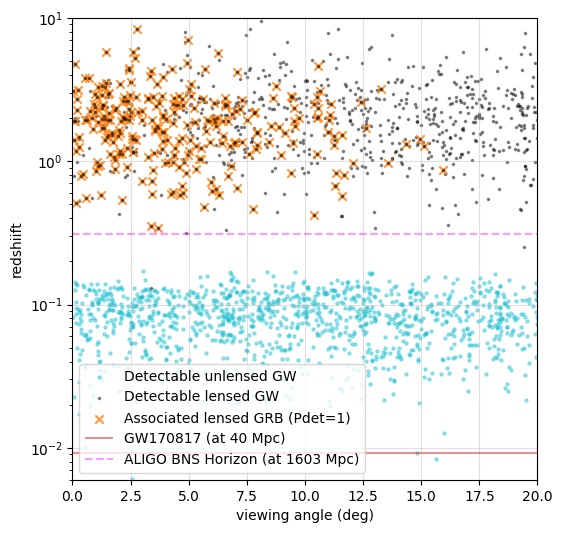

In [17]:
plt.figure(figsize=(6,6))

# unlensed GW
plt.scatter(viewing_angle_grb_unlensed, zs_gw_unlensed, c='C9', label="Detectable unlensed GW", alpha=0.4, marker='.', s=20)

# lensed GW
plt.scatter(viewing_angle_grb_lensed, zs_gw_lensed, c='k', label="Detectable lensed GW", alpha=0.4, marker='.', s=10)

# lensed GRB, two or more images pdet=1
idx_ = np.sum(pdet_lensed==1, axis=1)>=2
plt.scatter(viewing_angle_grb_lensed[idx_], zs_gw_lensed[idx_], c='C1', label="Associated lensed GRB (Pdet=1)", alpha=0.8, marker='x')
plt.scatter(viewing_angle_grb_lensed[idx_], zs_gw_lensed[idx_], c='k', alpha=0.4, marker='.', s=10)

# draw a horizontal line for GW170817, 40Mpc
plt.hlines(y=0.00927337, xmin=0, xmax=20, colors='C3', linestyles='solid', label='GW170817 (at 40 Mpc)', alpha=0.5)

# dhor 
plt.hlines(y=0.30839511, xmin=0, xmax=20, colors='magenta', linestyles='dashed', label="ALIGO BNS Horizon (at 1603 Mpc)", alpha=0.4)

plt.xlabel("viewing angle (deg)")
plt.ylabel("redshiift")
#plt.title("Detectable GRB vs associated detectable GW")
plt.yscale("log")
plt.xlim(0., 20)
plt.ylim(0.006, 10)
plt.legend(loc='lower left')
plt.grid(alpha=0.4)
# save the plot
plt.savefig("gw with associated grb final.png", dpi=400)
plt.show()

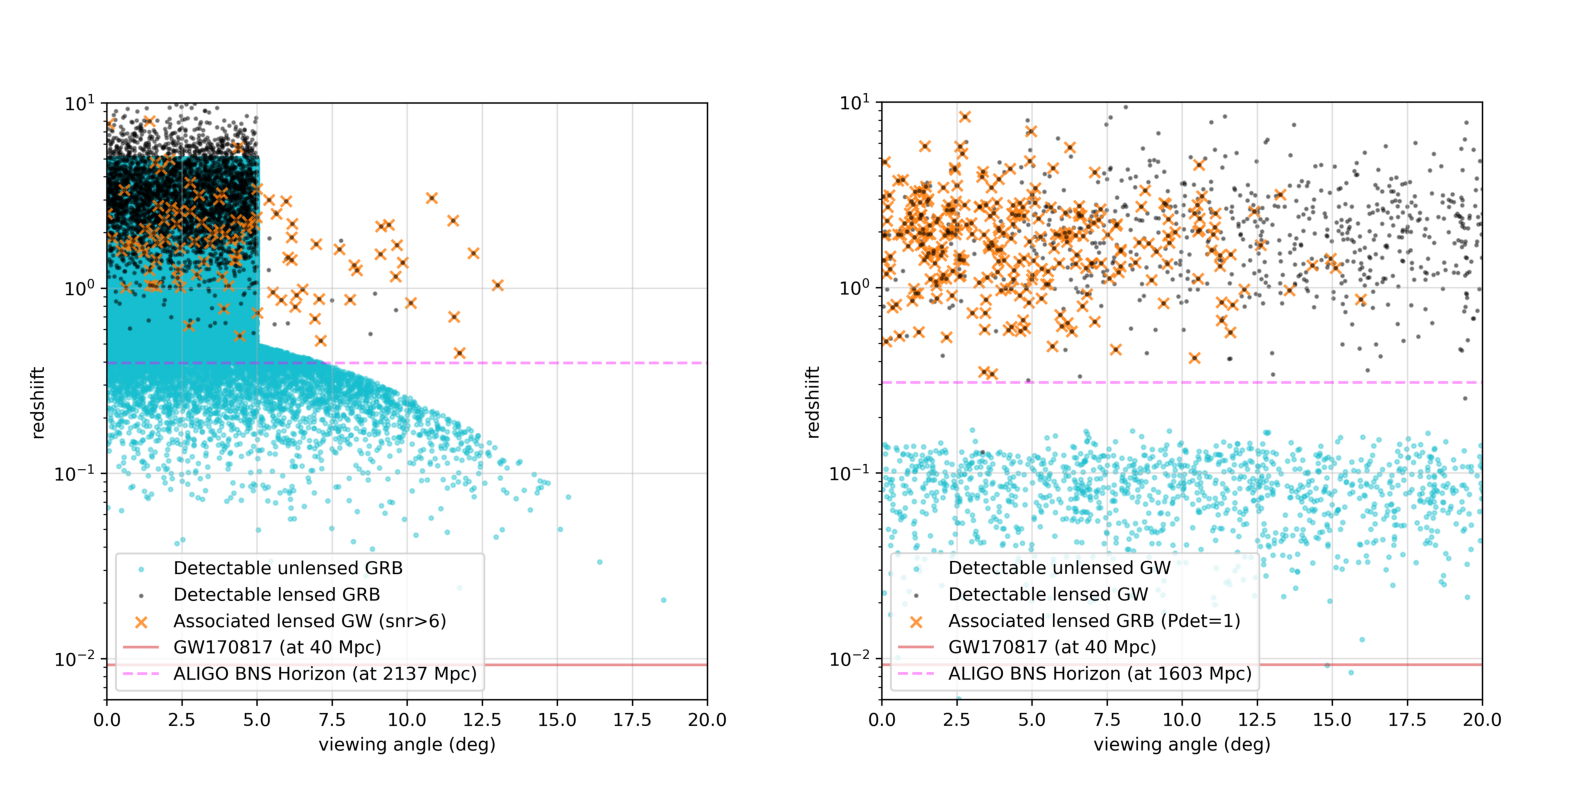

In [19]:
# two plots side by side
fig, axs = plt.subplots(1, 2, figsize=(20,12))
# call png files
img1 = plt.imread("grb with associated gw final.png")
img2 = plt.imread("gw with associated grb final.png")


# plot the images
axs[0].imshow(img1)
axs[0].axis('off')
axs[1].imshow(img2)
axs[1].axis('off')
# increase size of the images
plt.subplots_adjust(wspace=0.0)
# save the plot
plt.savefig("combined-final.png", dpi=100)
plt.show()